<h4> Session 7 </h4>

<h3><i><b>Analysis of CODE6</b></i></h2>
<I>

---


**Target:**

1.   Improve Model accuracy to reach stable test accuracy over 99.4
2.   Added GAP to remove the last layer

**Results:**

1.   Parameters: 5328
2.   Best Train Acc: 99.19(last Epoch)
3.   Best Test Acc: 99.22(last epoch)
4.   Difference : No overfitting
5.   Epoch - 15

**Analysis:**


1.   Model test accuracy is stuck around 99.20 which has to be further improved using adding augumentation


---


### Imports <hr>

In [3]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#!pip install torchsummary
from torchsummary import summary

import sys
sys.path.append('../')

# Loading classes from py files
from model import Net, ModelTraining
from utils import Utility

Class Object Initialization

In [4]:
# creating class objects
get_utilitites= Utility()

model_train = ModelTraining()

##### Check device support CPU/GPU <hr> 

In [5]:
device = Utility.set_cuda_if_available()
print(f'Device available for the script - {device}')
if device:
  torch.cuda.manual_seed(1)

CUDA Available? <function is_available at 0x000002247F7AFE20>
Device available for the script - cuda


##### Define dataset class for creating train/test loaders <hr>


In [6]:
class Dataset():
    """
    This class defines the train/test transforms for our CNN model for MNIST dataset
    """
    def __init__(self, batch_size):
        
        self.batch_size = batch_size
        self.kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

        self.train_transforms = transforms.Compose([
            # transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
            # transforms.Resize((28, 28)),
            # transforms.RandomRotation((-15., 15.), fill=0),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])

        # Test data transformations
        self.test_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            ])

    def train_loader(self):
        train = datasets.MNIST('../data', train=True, download=True, transform=self.train_transforms)
        return torch.utils.data.DataLoader(train, **self.kwargs)

    def test_loader(self):
        test = datasets.MNIST('../data', train=False, download=True, transform=self.test_transforms)
        return torch.utils.data.DataLoader(test, **self.kwargs)

##### Create Batch loader for train/test dataset  <hr>

In [7]:
get_data = Dataset(batch_size=64)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

##### View sample images from the train loader  <hr>



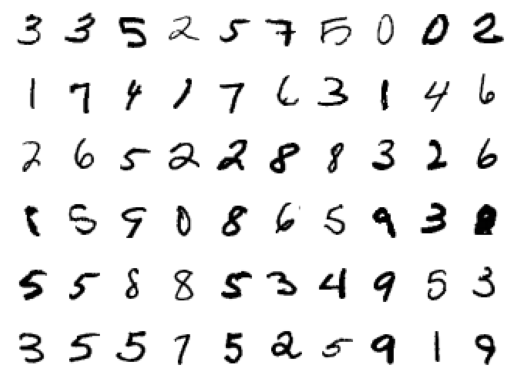

In [8]:
get_utilitites.plot_grid(train_loader)

##### CNN Model summary  <hr>


In [9]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 10, 26, 26]             720
              ReLU-6           [-1, 10, 26, 26]               0
       BatchNorm2d-7           [-1, 10, 26, 26]              20
           Dropout-8           [-1, 10, 26, 26]               0
            Conv2d-9           [-1, 12, 24, 24]           1,080
             ReLU-10           [-1, 12, 24, 24]               0
      BatchNorm2d-11           [-1, 12, 24, 24]              24
          Dropout-12           [-1, 12, 24, 24]               0
        MaxPool2d-13           [-1, 12, 12, 12]               0
           Conv2d-14            [-1, 8,

#### Let's Train and test our model
---


In [10]:
# variable for model and training
num_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=9, gamma=0.1, verbose=True)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train.train(model, device, train_loader, optimizer)
  model_train.test(model, device, test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0865, Accuracy: 9746/10000 (97.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0497, Accuracy: 9861/10000 (98.61%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0372, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0463, Accuracy: 9843/10000 (98.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0360, Accuracy: 9880/10000 (98.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0382, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0256, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0303, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0245, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0234, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.


Plot the Loss/Accuracy for Train/Test dataset

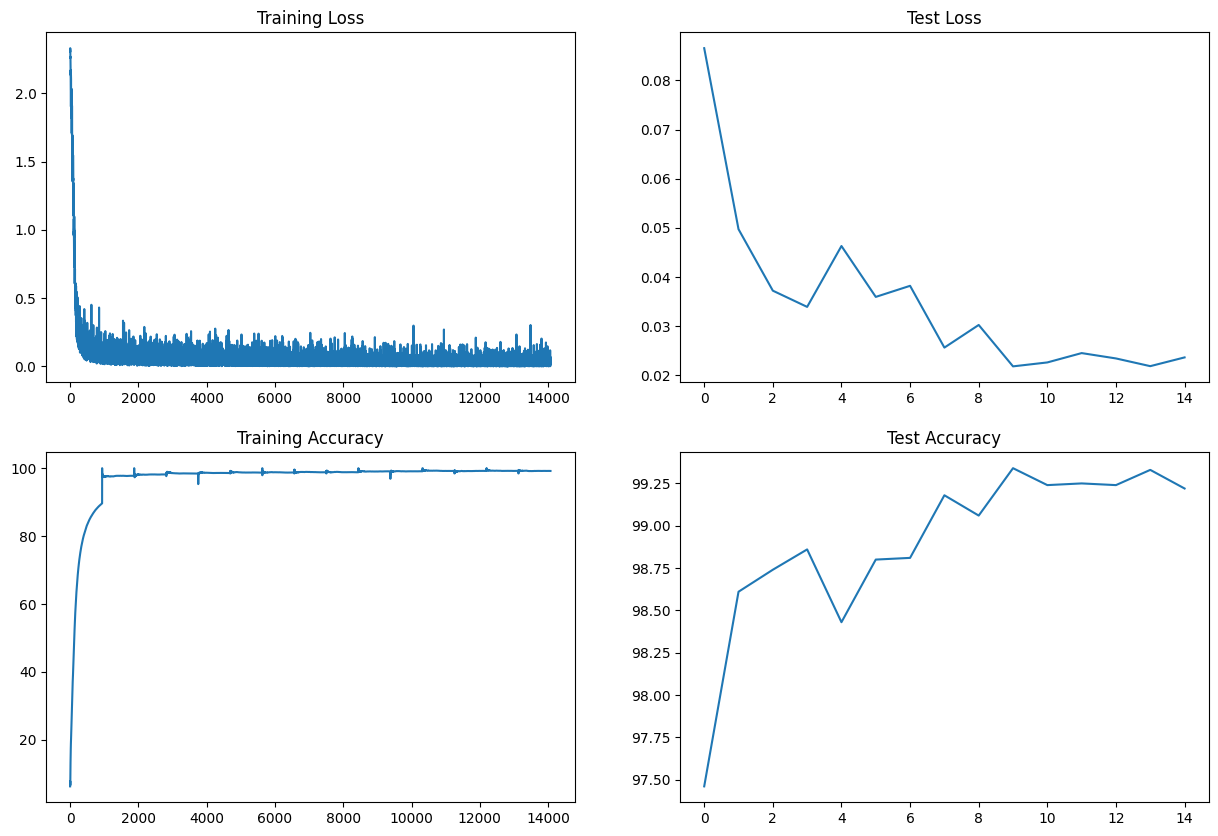

In [11]:
# CODE MOVED TO UTILS.PY

model_train.plot_loss_accuracy()